### Polymer chain
A simple model of a polymer in solution treats it as a sequence of randomly-oriented segments: that is, one for which there is no correlation between the orientation of one segment and any other (this is the so-called **random-flight model**). <br>
The Polymer object will also calculate the end-to-end distance (R) and will implement a method calc_Rg to calculate and return the polymer's radius of gyration, defined as: <br>
\begin{equation*}
R_g   = \sqrt{\frac {1}N \sum_{i=1}^N (r_i - r_{CM})^2}
\end{equation*}

In [1]:
import math
import random

class Polymer:
    """ A class representing a random-flight polymer in solution. """

    def __init__(self, N, a):
        """
        Initialize a Polymer object with N segments, each of length a.

        """

        self.N, self.a = N, a
        # self.xyz holds the segment position vectors as tuples
        self.xyz = [(None, None, None)] * N
        # End-to-end vector
        self.R = None
        # Make our polymer by assigning segment positions
        self.make_polymer()

    def make_polymer(self):
        """
        Calculate the segment positions, centre of mass and end-to-end
        distance for a random-flight polymer.

        """

        # Start our polymer off at the origin, (0,0,0).
        self.xyz[0] = x, y, z = cx, cy, cz = 0., 0., 0.
        for i in range(1, self.N):
            # Pick a random orientation for the next segment.
            theta = math.acos(2 * random.random() - 1)
            phi = random.random() * 2. * math.pi
            # Add on the corresponding displacement vector for this segment.
            x += self.a * math.sin(theta) * math.cos(phi)
            y += self.a * math.sin(theta) * math.sin(phi)
            z += self.a * math.cos(theta)
            # Store it, and update or centre of mass sum.
            self.xyz[i] = x, y, z
            cx, cy, cz = cx + x, cy + y, cz + z
        # Calculate the position of the centre of mass.
        cx, cy, cz = cx / self.N, cy / self.N, cz / self.N
        # The end-to-end vector is the position of the last
        # segment, since we started at the origin.
        self.R = x, y, z

        # Finally, re-centre our polymer on the centre of mass.
        for i in range(self.N):
            self.xyz[i] = self.xyz[i][0]-cx,self.xyz[i][1]-cy,self.xyz[i][2]-cz 
    def calc_Rg(self):
        """
        Calculates and returns the radius of gyration, Rg. The polymer
        segment positions are already given relative to the centre of
        mass, so this is just the rms position of the segments.

        """

        self.Rg = 0.
        for x,y,z in self.xyz:
            self.Rg += x**2 + y**2 + z**2
        self.Rg = math.sqrt(self.Rg / self.N)
        return self.Rg

### test Polymer class

In [2]:
# from polymer import Polymer
polymer = Polymer(1000,0.5)
polymer

In [3]:
polymer.R

(9.258658471608127, 11.01576343668339, 4.402488660632159)

In [4]:
polymer.calc_Rg()

6.380825549770334

In [5]:
# Compare the observed distribution of end-to-end distances for Np random-
# flight polymers with the predicted probability distribution function.

import pylab
pi = pylab.pi

# Calculate R for Np polymers
Np = 3000
# Each polymer consists of N segments of length a
N, a = 1000, 1.
R = [None] * Np
for i in range(Np):
    polymer = Polymer(N, a)
    Rx, Ry, Rz = polymer.R
    R[i] = pylab.sqrt(Rx**2 + Ry**2 + Rz**2)
    # Output a progress indicator every 100 polymers
    if not (i+1) % 100:
        print(i+1)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [6]:
%matplotlib inline

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


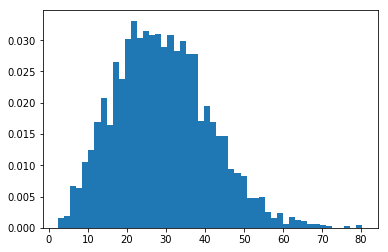

In [7]:
# Plot the distribution of Rx as a normalized histogram
# using 50 bins
pylab.hist(R, 50, normed=1)
pylab.show()

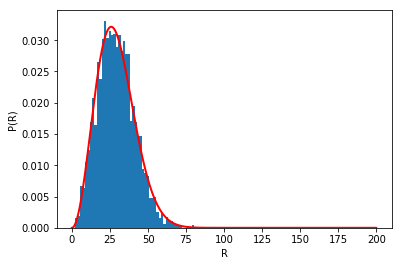

In [8]:
pylab.hist(R, 50, normed=1)
# Plot the theoretical probability distribution, Pr, as a function of r
r = pylab.linspace(0,200,1000)
msr = N * a**2
Pr = 4.*pi*r**2 * (2 * pi * msr / 3)**-1.5 * pylab.exp(-3*r**2 / 2 / msr)
pylab.plot(r, Pr, lw=2, c='r')
pylab.xlabel('R')
pylab.ylabel('P(R)')
pylab.show()